In [1]:
import numpy as np
import matplotlib.pyplot as plt

This method gives a quite general approach to sampling from arbitrary distributions, but we will start with a simpler problem: Generate a random vector $(X, Y)$ that is uniformly distributed over some bounded region $D\subset\mathbb{R}^2$.

That is, we want to generate $(X, Y)$ with the joint pdf

$$f_{XY}(x, y) = \left\{ \begin{array}{cc} \frac{1}{\textrm{Area}(D)} & (x, y) \in D \\ 0 & \textrm{otherwise} \end{array} \right.$$

We will do this by first finding a rectangle $B$ such that $D\subseteq B$, then using the following algorithm:

1) Generate $(V, W)$ from a uniform distribution on $B$.  (This is easy to do with the composition method, because $V$ and $W$ are independent and uniform.)

2) If $(V, W)\in D$, then set $X = V$ and $Y = W$.  Otherwise, go back to step 1 and start over.

In order to prove that this method works, we need to show the following: If $A\subseteq D$, then

$$\mathbb{P}\left[(X, Y)\in A\right] = \frac{\textrm{Area}(A)}{\textrm{Area}(D)}$$

To see this, notice that the probability of accepting $(V, W)$ on any one trial is

$$\mathbb{P}\left[(V, W)\in D\right] = \frac{\textrm{Area}(D)}{\textrm{Area}(B)}$$

Let $p$ denote this quantity.  Similarly,

$$\mathbb{P}\left[(V, W)\in A\:\vert\: (U, V)\in D\right] = \frac{\textrm{Area}(A)}{\textrm{Area}(D)}$$

We therefore have

$$\begin{aligned}
\mathbb{P}\left[(X, Y)\in A\right] &= \sum_{n = 0}^{\infty}\mathbb{P}\left[\textrm{We rejected }(V, W)\: n\textrm{ times and then accepted on the }n\textrm{th attempt}\right]\mathbb{P}\left[(V, W)\in A \:\vert\: (V, W)\in D\right] \\
&= \sum_{n = 0}^{\infty}\mathbb{P}\left[(V, W)\notin D\right]^{n}\cdot\mathbb{P}\left[(V, W)\in D\right]\cdot\mathbb{P}\left[(V, W)\in A\:\vert\: (V, W)\in D\right] \\
&= \sum_{n = 0}^{\infty}(1 - p)^{n}p\cdot\frac{\textrm{Area}(A)}{\textrm{Area}(D)} \\
&= \frac{\textrm{Area}(A)}{\textrm{Area}(D)}\cdot\frac{p}{1 - (1 - p)} \\
&= \frac{\textrm{Area}(A)}{\textrm{Area}(D)}
\end{aligned}$$

as desired.

### Example: Uniformly sample from the unit disc

As a concrete example, let's set $D$ to be the unit disc in $\mathbb{R}^2$.  That is,

$$D = \{(x, y)\in\mathbb{R}^2 \:\vert\: x^2 + y^2 \leq 1\}$$

and so

$$f_{XY}(x, y) = \left\{ \begin{array}{cc} \frac{1}{\pi} & x^2 + y^2 \leq 1 \\ 0 & \textrm{otherwise} \end{array} \right.$$

We could calculate the marginal and conditional distributions for $X$ and $Y$ and then use the composition method, but it's important to note that $X$ and $Y$ are **not** independent, and so this gets fairly messy.  Instead, we can use the acceptance-rejection method outlined above with the box $[-1, 1]\times [-1, 1]$.

### Example: Beta Distribution

Consider the random variable $X\sim \textrm{Beta}(4, 3)$, which has the pdf

$$f_{X}(x) = 60x^3(1 - x)^2 \:\textrm{ for all }\: 0 \leq x 1$$

From visual inspection, it seems like the graph of this pdf is fully contained in the box $[0, 1]\times [0, 3]$.

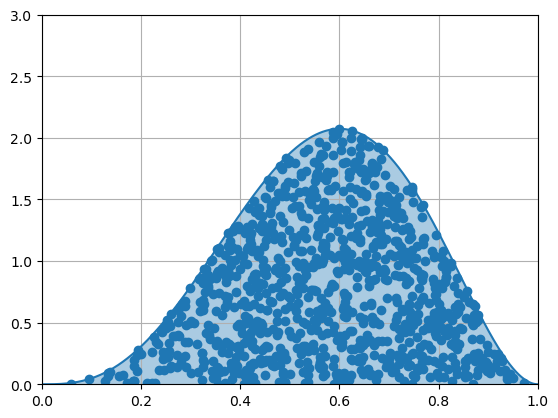

In [2]:
def make_axes(xlims, ylims, xlabel=None, ylabel=None):
    fig, ax = plt.subplots()
    ax.set_xlim((xlims[0], xlims[1]))
    ax.set_ylim((ylims[0], ylims[1]))
    if xlabel is not None:
        ax.set_xlabel(xlabel)
    if ylabel is not None:
        ax.set_ylabel(ylabel)
    ax.grid(True, which="both")

    return fig, ax

def draw_function_region(ax, f, xlim, color='#1f77b4', fc='#1f77b460'):
    x = np.linspace(xlim[0], xlim[1], 1000)
    y = f(x)
    ax.plot(x, f(x), color=color)
    ax.fill_between(x, y, fc=fc)

def generate_point(f, xlim, ylim):
    x = np.random.uniform(xlim[0], xlim[1])
    y = np.random.uniform(ylim[0], ylim[1])
    while y > f(x):
        x = np.random.uniform(xlim[0], xlim[1])
        y = np.random.uniform(ylim[0], ylim[1])
    return x, y

def f(x):
    return 60 * x ** 3 * (1 - x) ** 2

color = '#1f77b4'
xlim = [0, 1]
ylim = [0, 3]
fig, ax = make_axes(xlim, ylim)
draw_function_region(ax, f, xlim)


n = 1000
for _ in range(n):
    x, y = generate_point(f, xlim, ylim)
    ax.plot(x, y, marker='o', color=color)
plt.show()

In [3]:
def generate_point(f, xlim, ylim):
    x = np.random.uniform(xlim[0], xlim[1])
    y = np.random.uniform(ylim[0], ylim[1])
    while y > f(x):
        x = np.random.uniform(xlim[0], xlim[1])
        y = np.random.uniform(ylim[0], ylim[1])
    return x, y

def f(x):
    return 60 * x ** 3 * (1 - x) ** 2

n = 100000
x = np.zeros(n)
for k in range(n):
    x[k], _ = generate_point(f, xlim, ylim)

print("Expected value of X = {}".format(np.mean(x)))
print("\t The exact expected value is {}".format(4/7))
print("Variance of X = {}".format(np.var(x)))
print("\t The exact variance is {}".format(12/(49*8)))

Expected value of X = 0.5715391920616516
	 The exact expected value is 0.5714285714285714
Variance of X = 0.03060638946594567
	 The exact variance is 0.030612244897959183
